# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [4]:
data = pd.read_csv('Training Data.csv')

# EDA

## 1. Descriptive Statistics

In [5]:
# melihat informasi awal dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Tipe data sudah sesuai untuk masing-masing kolom, tidak ada kolom yang memiliki nilai kosong,

In [6]:
# memisahkan kolom numerikal dan kategorikal
numerik = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
kategorikal = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# id = urutan & risk_flag = boolean --> jadi gak masuk ke kolom numerik & kategoriksl

In [7]:
# Melihat deskripsi data kategori
data[kategorikal].describe()

Married/Single House_Ownership Car_Ownership Profession           CITY  \
count          252000          252000        252000     252000         252000   
unique              2               3             2         51            317   
top            single          rented            no  Physician  Vijayanagaram   
freq           226272          231898        176000       5957           1259   

                STATE  
count          252000  
unique             29  
top     Uttar_Pradesh  
freq            28400

In [8]:
# cek nilai unique dari masing-masing kolom data kategori
print('Kolom Married/Single')
data['Married/Single'].value_counts()

Kolom Married/Single


single     226272
married     25728
Name: Married/Single, dtype: int64

In [9]:
print('Kolom House_Ownership')
data['House_Ownership'].value_counts()

Kolom House_Ownership


rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [10]:
print('Kolom Car_Ownership')
data['Car_Ownership'].value_counts()

Kolom Car_Ownership


no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [11]:
print('Kolom Profession')
data['Profession'].value_counts()

Kolom Profession


Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [12]:
print('Kolom CITY')
data['CITY'].value_counts()

Kolom CITY


Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [13]:
print('Kolom STATE')
data['STATE'].value_counts()

Kolom STATE


Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

FEEDBACK MENTORING
1. di cek dari etiap kategorinya, misal dari 3 house_ownership ada apa aja dan apakah ada yang redundan (memiliki arti yang sama)
2. Cek perbedaan nilai mean median dll (diagnosis awal) dan detailnya di Univariate.

AFTER MENTORING UPDATE

Dari hasil pengecekan nilai unique setiap kolom sudah dipastikan nilai unique nya sesuai dan tidak redundan, hanya saja butuh pengelompokkan data agar tidak terlalu luas ketika dilihat melalui grafik distribusi data. Pengelompokkan akan dilakukan pada univariate analysis.

In [14]:
# Melihat deskripsi data numerik
data.describe()

Id        Income            Age     Experience  \
count  252000.000000  2.520000e+05  252000.000000  252000.000000   
mean   126000.500000  4.997117e+06      49.954071      10.084437   
std     72746.278255  2.878311e+06      17.063855       6.002590   
min         1.000000  1.031000e+04      21.000000       0.000000   
25%     63000.750000  2.503015e+06      35.000000       5.000000   
50%    126000.500000  5.000694e+06      50.000000      10.000000   
75%    189000.250000  7.477502e+06      65.000000      15.000000   
max    252000.000000  9.999938e+06      79.000000      20.000000   

       CURRENT_JOB_YRS  CURRENT_HOUSE_YRS      Risk_Flag  
count    252000.000000      252000.000000  252000.000000  
mean          6.333877          11.997794       0.123000  
std           3.647053           1.399037       0.328438  
min           0.000000          10.000000       0.000000  
25%           3.000000          11.000000       0.000000  
50%           6.000000          12.000000       0.000000  
75%           9.000000          13.000000       0.000000  
max          14.000000          14.000000       1.000000

KESIMPULAN DESCRIPTIVE ANALYSIS
1.  Data terdiri dari 252000 baris and 13 kolom dan tidak ada nilai null
2.  5 kolom dengan variabel kontinu : Income , Age , Experience , Current_Job_years , Current_House_years
3.  8 kolom dengan variabel kategori : ID , Marriage status ,house ownership, car ownership , profession , city , state , Risk flag (target variabel)

## 2. Univariate Analysis

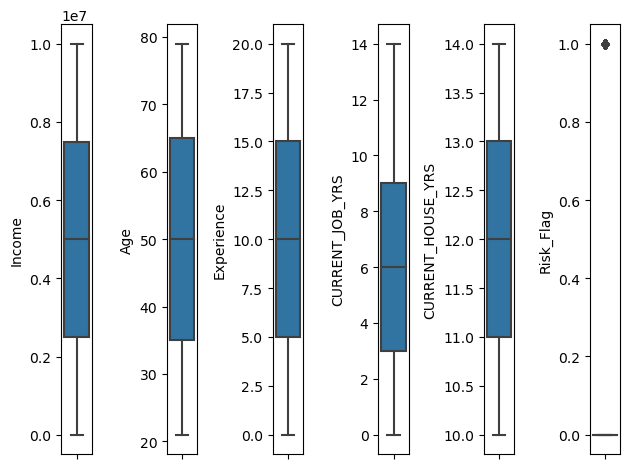

In [15]:
# analisis setiap kolom numerik untuk melihat distribusi nilai (menggunakan boxplot)

features = numerik
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=data[features[i]], orient='v')
  plt.tight_layout()

Kesimpulan distribusi nilai pada kolom numerik: tidak ada outlier

Tidak adanya outlier menandakan bahwa distribusi data normal

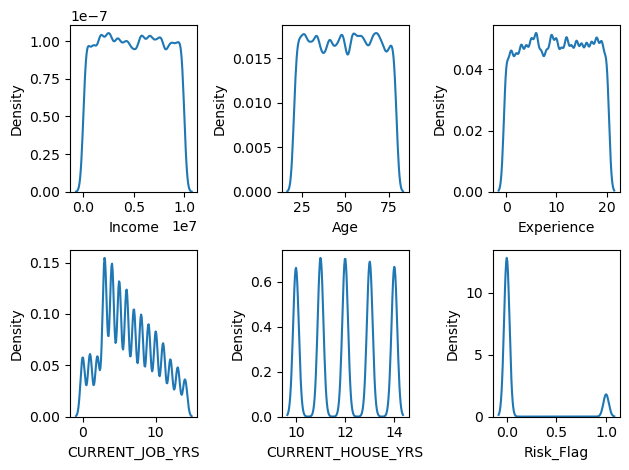

In [16]:
# analisis setiap kolom numerik untuk melihat distribusi nilai (menggunakan distribution plot)

features = numerik
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.kdeplot(x=data[features[i]])
  plt.xlabel(features[i])
  plt.tight_layout()

Bentuk distribusi setiap kolom numerik
- Income, age dan experience : uniform distribution, karena data memiliki nilai yang seragam dan tidak terjadi lonjakan sehingga data memiliki probabilitas yang sama
- Current_job_yrs : Skewness positive, ekor distribusi berada di sebelah kanan dengan nilai terbanyak sehingga distribusi sebagian besar berada pada nilai rendah
- current_house_yrs : multimodal distribution curve, karena data memiliki modus yang lebih dari satu

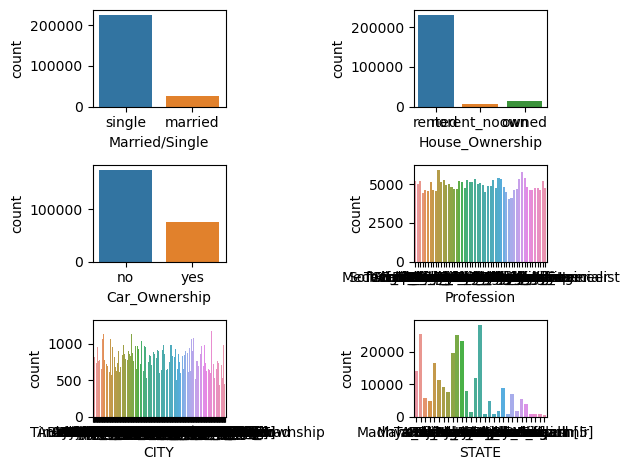

In [17]:
# analisis setiap kolom kategorik untuk melihat distribusi nilai (menggunakan countplot)

features = kategorikal
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data[features[i]])
  plt.tight_layout()


1. Kolom kategorikal dengan banyak kategori terjadi pada kolom city, state dan profession sehingga data perlu dikelompokan menjadi beberapa kategori yang serupa menjadi satu kategori baru untuk menyederhanakan data.

2. Kolom Kategorikal dengan Dominasi Kategori Tertentu pada kolom married/single, dan house_ownership yang mengindikasikan ketidakseimbangan dalam data sehingga perlu diperhatikan apakah akan memperngaruhi memengaruhi analisis seperti oversampling atau undersampling diperlukan.

Berdasarkan kesimpulan tersebut, maka kolom Profession, CITY, dan STATE **tidak direkomendasikan** menjadi fitur karena akan memperlambat waktu learning

**Data Pre Processing yang Dapat Dilakukan**:

* Transformasi Data untuk data distribusi yang miring atau non-normal, pertimbangkan untuk menerapkan transformasi pada data numerik.
* Feature Engineering untuk kolom yang terlalu banyak kategori, dapat dikelompokan menjadi beberapa kategori yang lebih umum atau menggunakan metode seperti one-hot encoding atau label encoding.
* Handling Imbalance:untuk data kategorik yang tidak seimbang sehingga akan diputuskan apakah oversampling (menambahkan data minoritas) atau undersampling (mengurangi data mayoritas) diperlukan untuk menyeimbangkan dataset atau tidak
* Feature Selection: Berdasarkan hasil observasi distribusi,dipilih fitur-fitur yang memiliki dampak signifikan dalam analisis.

FEEDBACK MENTOR


1.   Cari Top count nya, lalu bisa dipersempit kelasnya ke grup yang lebih umum misal ASN, Non-ASN, dan lainnya
2.   Di bagian modelling, hipotesis fitur dengan kategori banyak gak berpengaruh ke modelnya.
3. Nanti bisa dicek diiterasi pertama dengan pre processing (e.g. One Hot Encoding) pertama yang sederhana. Pakai algoritma yang bisa ngeluarin feature importance seperti RF dll
4. bisa tes juga di multivariate
5. Di feature engineering, data numerical bisa di grouping seperti umur, experience, dll. (kalo frekuensi category uniquenya terlau lebar)

PERBAIKAN SETELAH FEEDBACK MENTORING

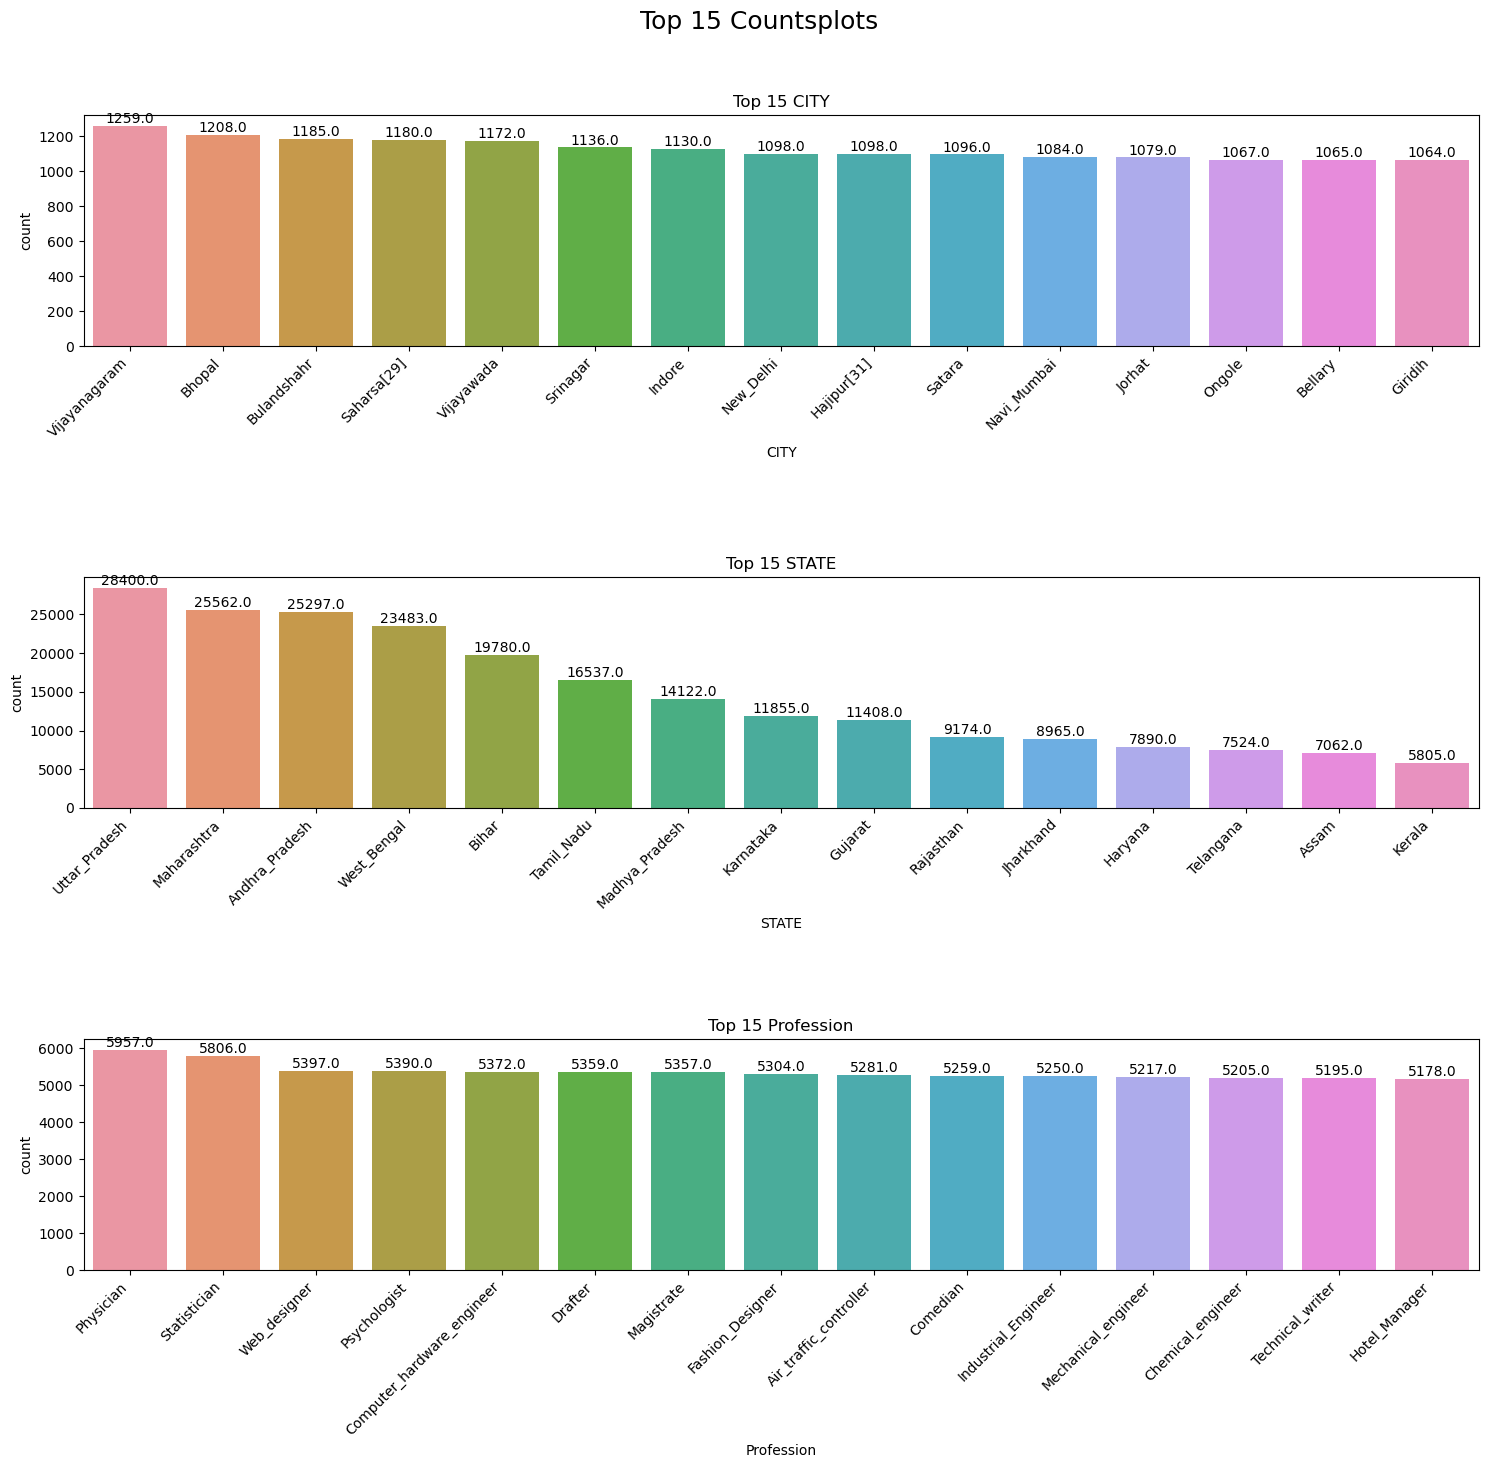

In [19]:
# top count untuk kolom profession, city, dan state

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))
plt.subplots_adjust(hspace=1)
fig.suptitle("Top 15 Countsplots", fontsize=18, y=0.95)


#Construct subplots
for col , ax in zip(['CITY','STATE', 'Profession'] , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=data,  x= col , order=data[col].value_counts().iloc[:15].index)
    countplot.set_title("Top 15 "+ col)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in countplot.patches:
        countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

**Pengelompokan data kategorikal = Profession**

In [20]:
# pengelompokkan data kategorikal = Profession
data['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [21]:
def profession_grouping(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist']:
        return('Engineering')
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return('IT/Software')
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return('Government')
    elif profession in ['Librarian', 'Teacher']:
        return('Education')
    elif profession in ['Economist', 'Financial_Analyst']:
        return('Finance')
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return('Aviation')
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return('Design')
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return('Medical Practitioner')
    elif profession in ['Hotel_Manager', 'Chef']:
        return('Hospitality')
    elif profession in ['Comedian', 'Psychologist']:
        return('Entertainment')
    elif profession in ['Secretary', 'Computer_operator']:
        return('Administration')
    elif profession in ['Chartered_Accountant', 'Analyst']:
        return('Finance/Accounting')
    elif profession in ['Technician', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician']:
        return('Science/Research')
    else:
        return ('Other')

# artist tidak termasuk grouping karena hanya 1 jenis artist, tidak ada pembagiannya

In [22]:
# apply fungsi grouping ke kolom profession
data['Profession_Group'] = data['Profession'].apply(profession_grouping)

In [23]:
print('Kolom profession setelah di grouping')
data['Profession_Group'].value_counts()

Kolom profession setelah di grouping


Engineering             45294
Other                   33115
Government              28497
Science/Research        25004
IT/Software             20811
Medical Practitioner    15511
Aviation                15167
Design                  14559
Entertainment           10649
Administration          10051
Hospitality              9813
Finance                  9740
Finance/Accounting       9161
Education                4628
Name: Profession_Group, dtype: int64

<Axes: >

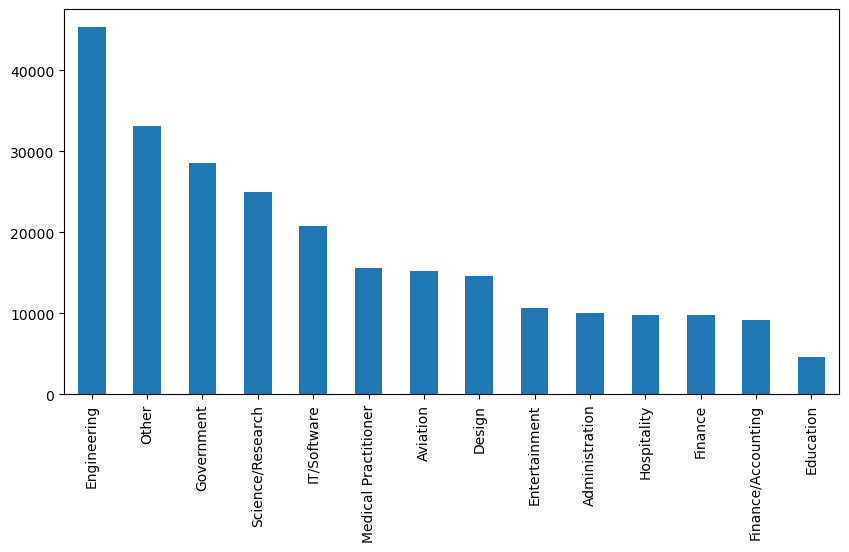

In [24]:
plt.figure(figsize=(10,5))
prof = data['Profession_Group'].value_counts()
prof.plot(kind='bar')

Kesimpulan: Profession terbanyak adalah engineering sebesar 45294 orang dan terendah adalah education sebesar 4628 orang

**Pengelompokan data numerik = Age**



In [25]:
# pengelompokkan data numerik = Age
age_unique = data['Age'].unique()
print(sorted(age_unique))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [26]:
def age_grouping(age):
    if age >= 8 and age <= 23:
        return('Z')
    elif age >= 24 and age <= 39 :
        return('Millenial')
    elif age >= 40 and age <= 55:
        return('X')
    elif age >= 56 and age <= 74:
        return('Baby Boomer')
    elif age >= 75:
        return('Pre-Boomer')
    else:
        return ('Other')

In [27]:
# apply fungsi grouping ke kolom age
data['Generation'] = data['Age'].apply(age_grouping)

In [28]:
print('Age setelah di grouping berdasarkan generasi')
data['Generation'].value_counts()

Age setelah di grouping berdasarkan generasi


Baby Boomer    81630
X              68164
Millenial      67959
Pre-Boomer     21290
Z              12957
Name: Generation, dtype: int64

<Axes: >

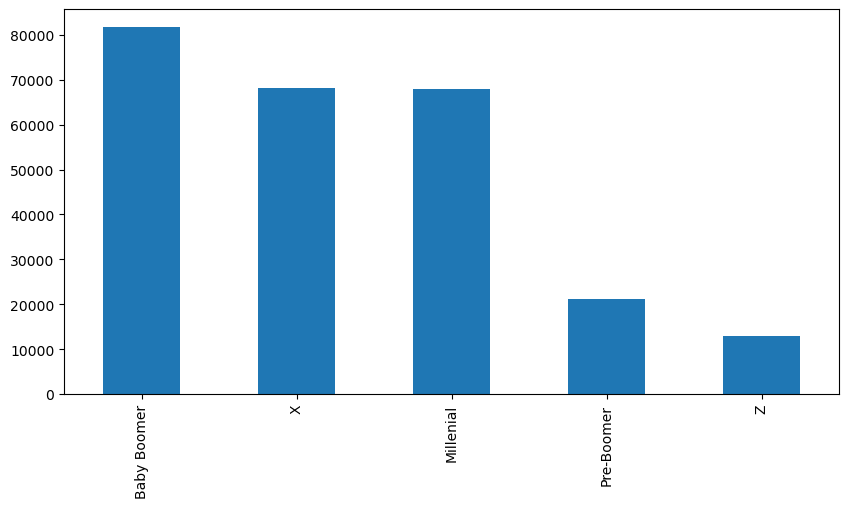

In [29]:
plt.figure(figsize=(10,5))
data['Generation'].value_counts().plot(kind='bar')

Kesimpulan: Jumlah generasi terbanyak adalah baby boomer sebesar 81630 orang dan generasi terendah adalah Z sebesar 12957 orang

**Pengelompokan data kategorikal = State**

In [30]:
# pengelompokkan data kategorikal = State
data['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [32]:
# pengelompokan data kategorikal = state
def segment_state(state):
    if state in ['Rajasthan', 'Maharashtra', 'Gujarat',
                'Daman & Diu', 'Dadra & Nagar Haveli',
                'Maharashtra','Goa', 'Madhya_Pradesh']:
        return 'West Zone'
    elif state in ['Andhra Pradesh', 'Andhra_Pradesh', 'Karnataka', 'Lakshadweep',
                'Kerala', 'Tamil Nadu', 'Tamil_Nadu', 'Puducherry',
                'Andaman & Nicobar']:
        return 'South Zone'
    elif state in ['Jammu & Kashmir', 'Jammu_and_Kashmir','Himachal Pradesh', 'Himachal_Pradesh', 'Punjab',
                'Chandigarh', 'Uttarakhand', 'Haryana', 'Telangana',
                'Delhi', 'Uttar Pradesh', 'Uttar_Pradesh','Uttar_Pradesh[5]']:
        return 'North Zone'
    elif state in ['Bihar', 'Sikkim', 'Arunachal Pradesh', 'Arunachal_Pradesh',
                'Nagaland','Manipur', 'Mizoram',
                'Tripura', 'Meghalaya', 'Assam',
                'West Bengal', 'West_Bengal','Jharkhand', 'Odisha',
                'Chhattisgarh']:
        return 'East Zone'
    else:
        return 'Unknown'

In [33]:
# apply fungsi grouping ke kolom state
data['zone'] = data['STATE'].apply(segment_state)
data ['zone'].value_counts()

East Zone     70897
South Zone    60927
West Zone     60266
North Zone    59910
Name: zone, dtype: int64

<Axes: >

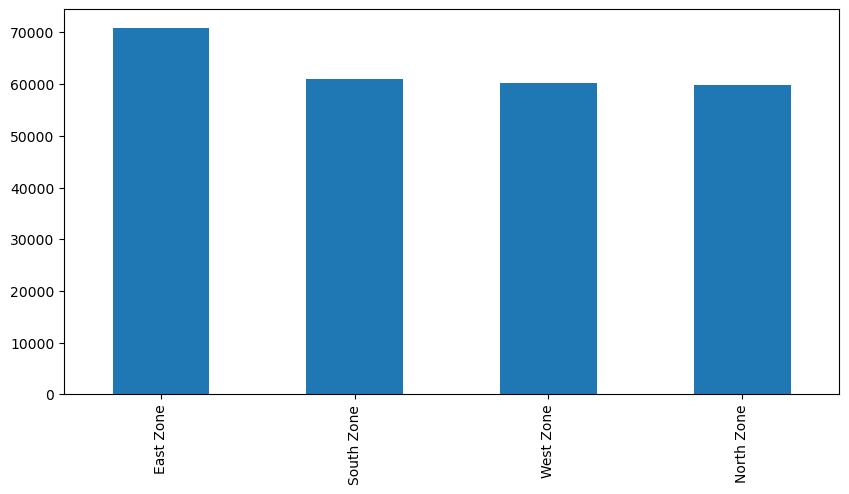

In [34]:
plt.figure(figsize=(10,5))
data['zone'].value_counts().plot(kind='bar')

Kesimpulan: zona tertinggi pada east zone dan zona terendah pada north zone

**Pengelompokan data numerik = Experience**

In [35]:
# pengelompokkan data numerik = Experience
experience_unique = data['Experience'].unique()
print(sorted(experience_unique))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [36]:
def segment_experience(experience):
    experience = str(experience)
    if experience in ['0', '1', '2', '3']:
        return '0-3 Tahun'
    elif experience in ['4', '5', '6']:
        return '4-6 Tahun'
    elif experience in ['7', '8', '9', '10']:
        return '7-10 Tahun'
    elif experience in ['11', '12', '13', '14', '15']:
        return '11-15 Tahun'
    else:
        return '15+ Tahun'

In [37]:
# apply fungsi grouping ke kolom experience
data['work_experience'] = data['Experience'].apply(segment_experience)
print('Experience setelah di grouping berdasarkan tahun bekerjanya')
data['work_experience'].value_counts()

Experience setelah di grouping berdasarkan tahun bekerjanya


15+ Tahun      60475
11-15 Tahun    60324
7-10 Tahun     48021
0-3 Tahun      45774
4-6 Tahun      37406
Name: work_experience, dtype: int64

<Axes: >

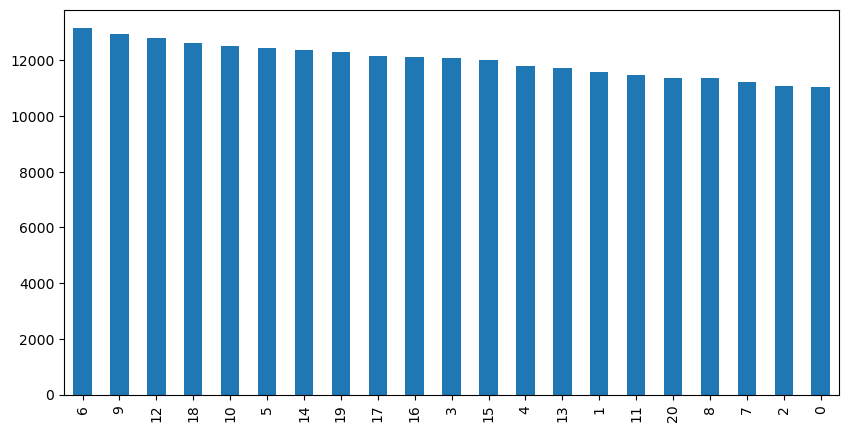

In [38]:
plt.figure(figsize=(10,5))
data['Experience'].value_counts().plot(kind='bar')

<Axes: >

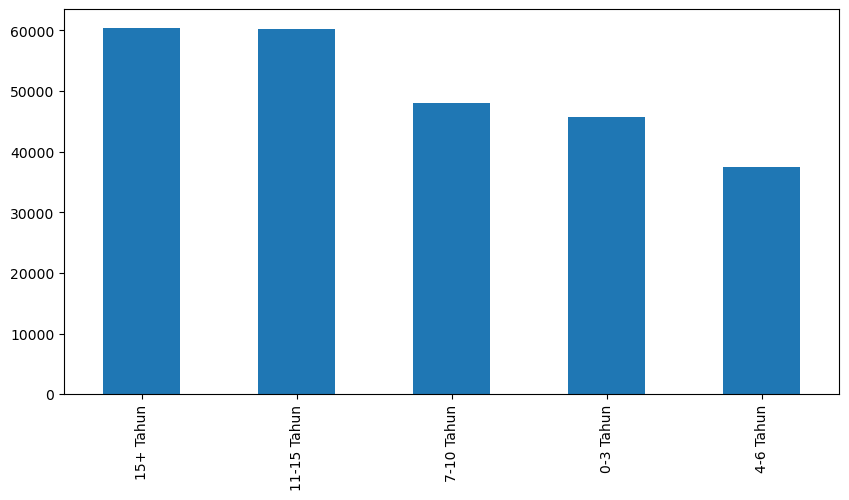

In [39]:
plt.figure(figsize=(10,5))
data['work_experience'].value_counts().plot(kind='bar')

Kesimpulan: Kelompok pelanggan terbanyak yang memiliki pengalaman pekerjaan diatas 15 tahun sebesar 60475. Dan pelanggan paling sedikit berada di kelompok dengan pengalaman pekerjaaan 4-6 tahun

**Pengelompokan data numerik = Income**

In [40]:
# pengelompokkan data numerik = income
income_unique = data['Income'].unique()
max_income = data['Income'].max()
min_income = data['Income'].min()
print (max_income)
print (min_income)

9999938
10310


In [41]:
def income_grouping(income):
    if income >= 10000 and income <= 3000000 :
        return('Low')
    elif income >= 3000001 and income <= 6000000 :
        return('Medium')
    else:
        return ('High')

In [42]:
# apply fungsi grouping ke kolom income
data['income_rate'] = data['Income'].apply(income_grouping)
print('Income setelah di grouping berdasarkan generasi')
data['income_rate'].value_counts()

Income setelah di grouping berdasarkan generasi


High      100745
Low        76001
Medium     75254
Name: income_rate, dtype: int64

<Axes: >

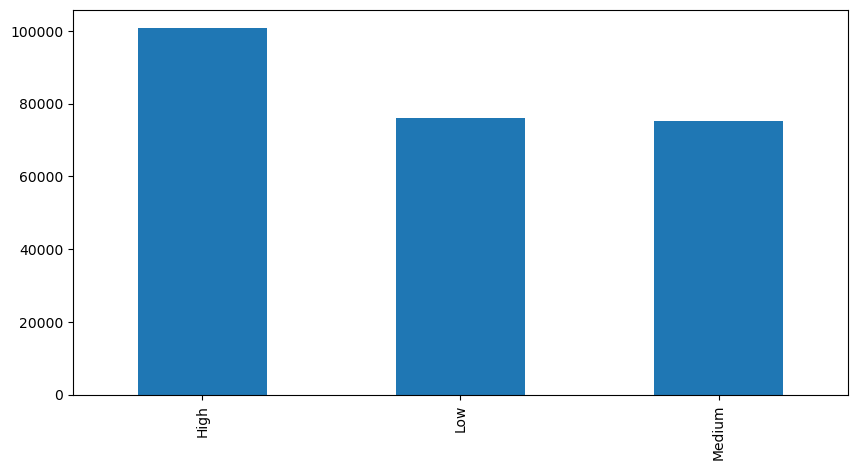

In [43]:
plt.figure(figsize=(10,5))
data['income_rate'].value_counts().plot(kind='bar')

Kesimpulan: Kelompok pelanggan terbanyak memiliki income diatas 6000000 dan pelanggan terkecil memiliki pendapat 10000 - 3000000

In [44]:
# cek distribusi data setelah grouping

aft_grouping_numerik = ['income_rate', 'Generation', 'work_experience']
aft_grouping_kategorikal = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession_Group', 'CITY', 'zone']

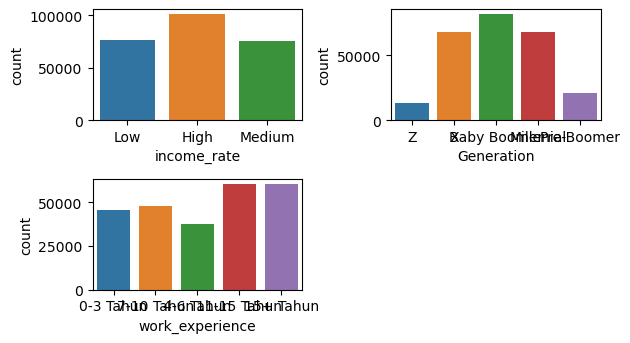

In [45]:
# analisis setiap kolom numerik untuk melihat distribusi nilai

features = aft_grouping_numerik
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data[features[i]])
  plt.tight_layout()

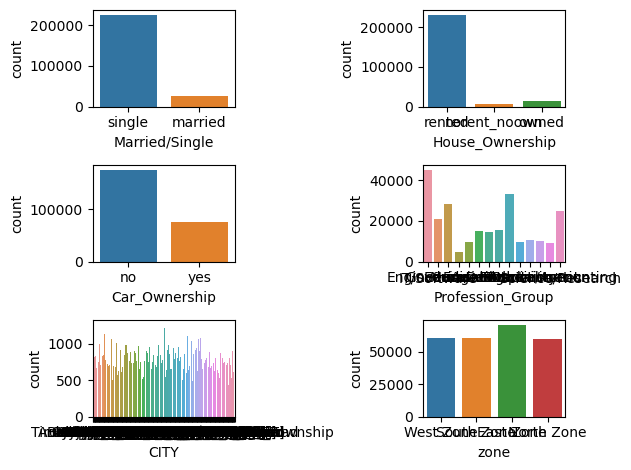

In [46]:
# analisis setiap kolom kategorik untuk melihat distribusi nilai

features = aft_grouping_kategorikal
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data[features[i]])
  plt.tight_layout()

Ref:

https://www.kaggle.com/code/harimi/loan-prediction-based-on-customer-behavior

https://www.kaggle.com/code/dinghungchen/load-defaulting-descriptive-and-classification-pre <-- di source yang ini ada uji chi square kalo mau dipake di multivariate

**Missing Value**

In [47]:
#Check missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

Kesimpulan: Tidak ada missing value

## 3. Multivariate Analysis

In [48]:
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_10472\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Id    Income       Age  Experience  CURRENT_JOB_YRS  \
Id                 1.000000 -0.001324 -0.001816   -0.005810        -0.003250   
Income            -0.001324  1.000000 -0.000652    0.006422         0.007045   
Age               -0.001816 -0.000652  1.000000   -0.001118         0.002154   
Experience        -0.005810  0.006422 -0.001118    1.000000         0.646098   
CURRENT_JOB_YRS   -0.003250  0.007045  0.002154    0.646098         1.000000   
CURRENT_HOUSE_YRS  0.001972 -0.002397 -0.020134    0.019309         0.005372   
Risk_Flag          0.032153 -0.003091 -0.021809   -0.034523        -0.016942   

                   CURRENT_HOUSE_YRS  Risk_Flag  
Id                          0.001972   0.032153  
Income                     -0.002397  -0.003091  
Age                        -0.020134  -0.021809  
Experience                  0.019309  -0.034523  
CURRENT_JOB_YRS             0.005372  -0.016942  
CURRENT_HOUSE_YRS           1.000000  -0.004375  
Risk_Flag                  -0.004375   1.000000

C:\Users\USER\AppData\Local\Temp\ipykernel_10472\1543452717.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

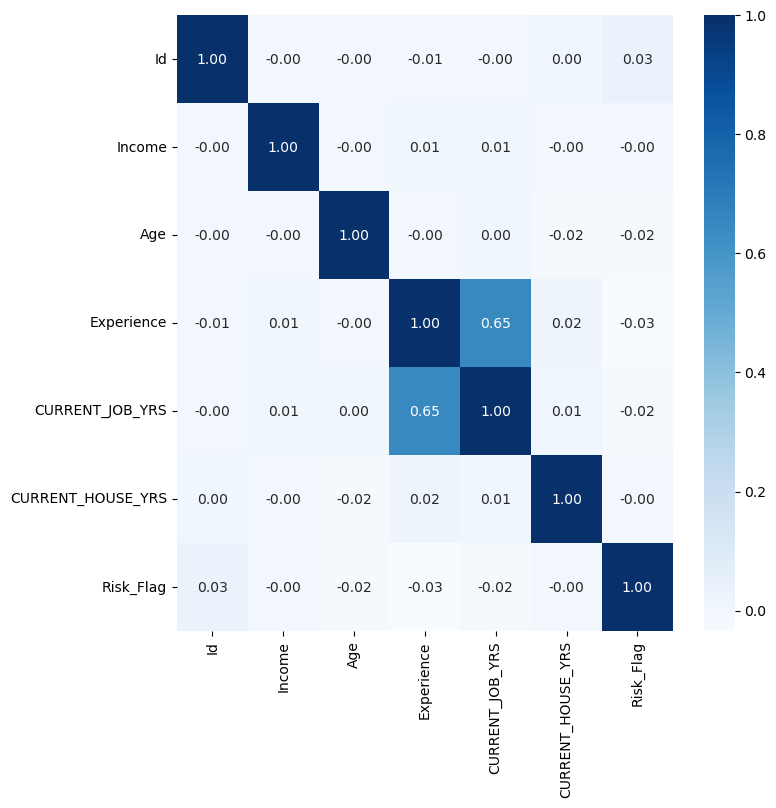

In [49]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

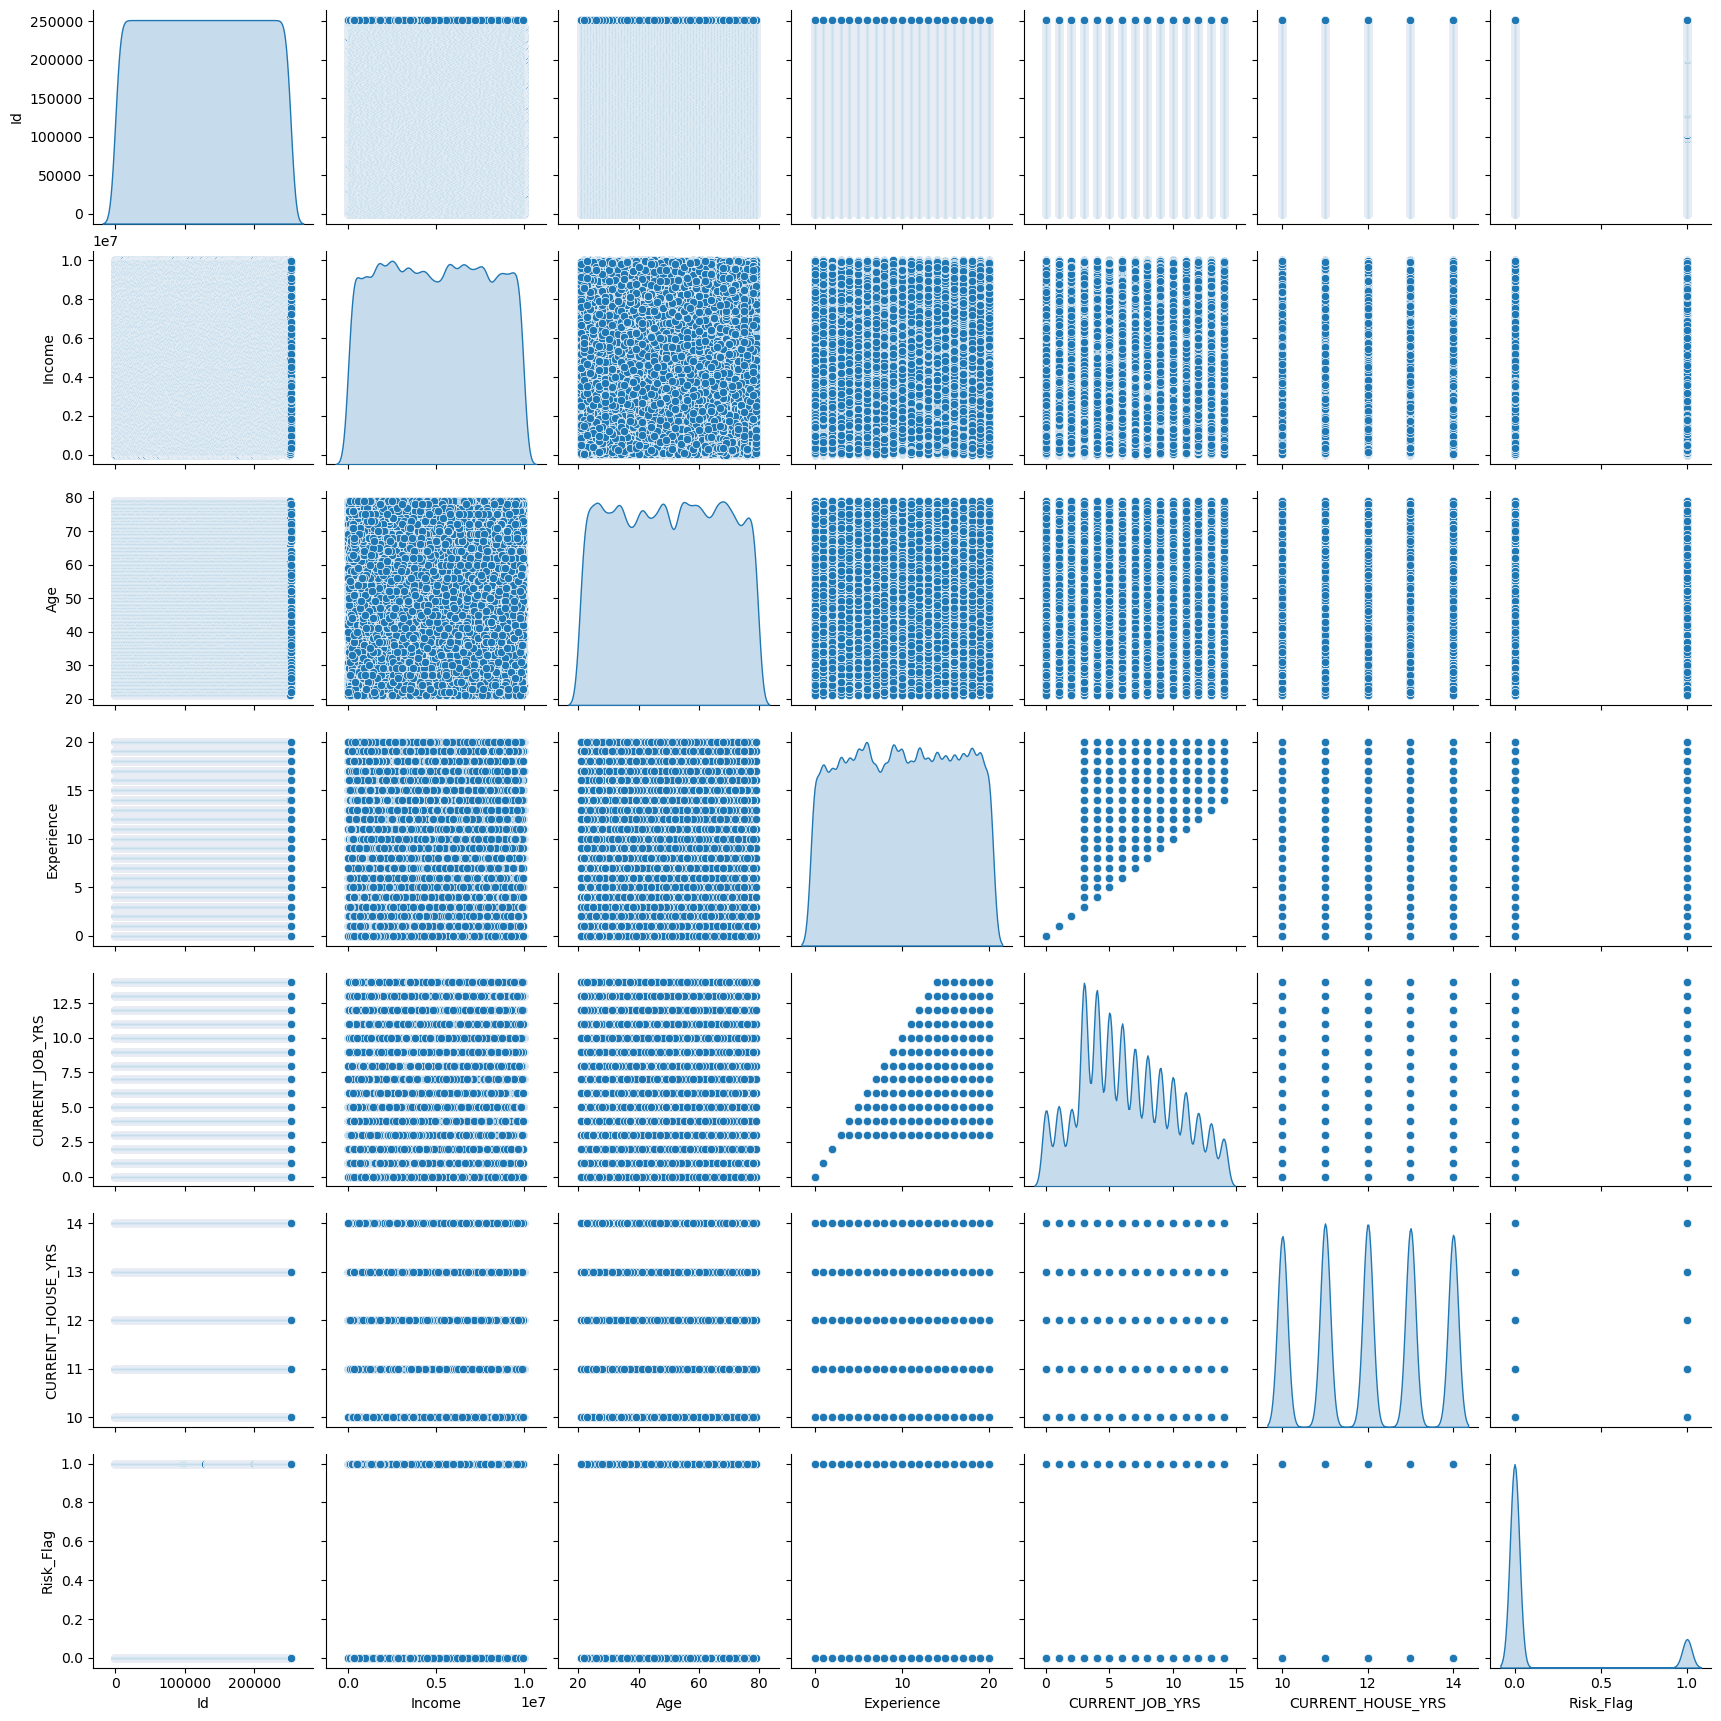

In [50]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde')

<Figure size 1500x1500 with 0 Axes>

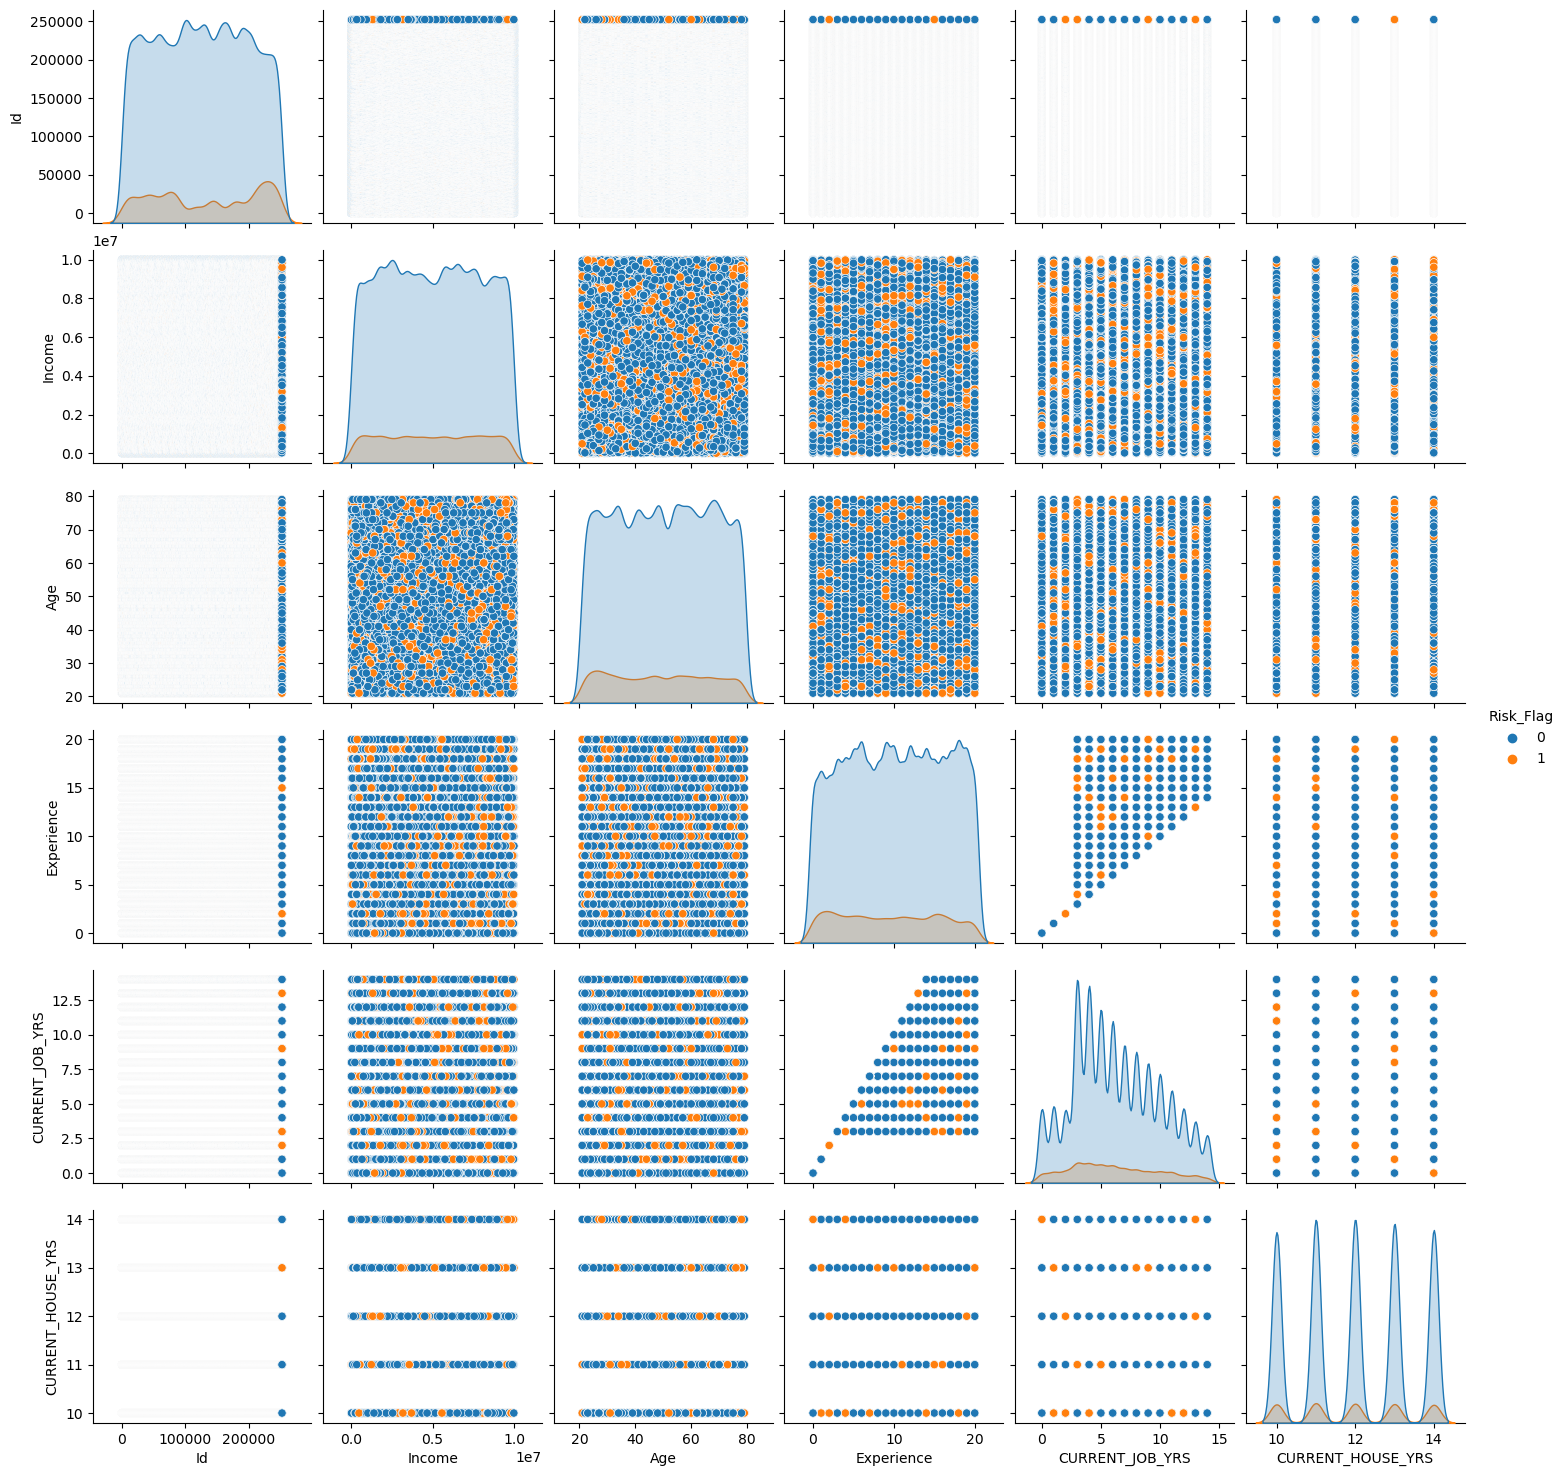

In [51]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde', hue='Risk_Flag')

In [52]:
# Data professions
professions = {
    "Healthcare": ['Physician', 'Psychologist', 'Dentist', 'Surgeon'],
    "Engineering & IT": ['Statistician', 'Web_designer',
                        'Computer_hardware_engineer', 'Drafter',
                        'Industrial_Engineer', 'Mechanical_engineer',
                        'Chemical_engineer', 'Biomedical_Engineer',
                        'Petroleum_Engineer', 'Technology_specialist',
                        'Design_Engineer', 'Civil_engineer',
                        'Software_Developer', 'Computer_operator'],
    "Management & Law": ['Magistrate', 'Hotel_Manager', 'Financial_Analyst',
                        'Consultant', 'Chartered_Accountant']
}

# Data state
segment_state = {
    'West Zone': ['Rajasthan', 'Maharashtra', 'Gujarat',
                'Daman & Diu', 'Dadra & Nagar Haveli',
                'Maharashtra', 'Goa', 'Madhya_Pradesh'],
    'South Zone': ['Andhra Pradesh', 'Andhra_Pradesh', 'Karnataka', 'Lakshadweep',
                'Kerala', 'Tamil Nadu', 'Tamil_Nadu', 'Puducherry',
                'Andaman & Nicobar'],
    'North Zone': ['Jammu & Kashmir', 'Jammu_and_Kashmir', 'Himachal Pradesh', 'Himachal_Pradesh', 'Punjab',
                'Chandigarh', 'Uttarakhand', 'Haryana', 'Telangana',
                'Delhi', 'Uttar Pradesh', 'Uttar_Pradesh', 'Uttar_Pradesh[5]'],
    'East Zone': ['Bihar', 'Sikkim', 'Arunachal Pradesh', 'Arunachal_Pradesh',
                'Nagaland', 'Manipur', 'Mizoram',
                'Tripura', 'Meghalaya', 'Assam',
                'West Bengal', 'West_Bengal', 'Jharkhand', 'Odisha',
                'Chhattisgarh']
}

# Data kota
kategori_kota = {
    'Metro': ['Mumbai', 'Delhi_city', 'Kolkata', 'Bangalore', 'Chennai', 'Hyderabad', 'Pune'],
    'Urban': ['Ahmedabad', 'Gurgaon', 'Noida', 'Navi_Mumbai', 'Thane', 'Jaipur', 'Vadodara', 'Vijayawada'],
    'Suburban': ['Lucknow', 'Nagpur', 'Indore', 'Kochi', 'Bhopal', 'Patna', 'Visakhapatnam', 'Coimbatore'],
    'Town': ['Srinagar', 'Jodhpur', 'Amritsar', 'Kota', 'Ajmer', 'Bikaner', 'Mysore'],
    'Rural': ['Gorakhpur', 'Warangal', 'Siliguri', 'Dhanbad', 'Farrukhabad', 'Haldia', 'Gangtok']
}

# Data age
age = {
    "Millennials": range(21, 40),
    "Gen X": range(40, 55),
    "Baby Boomers": range(55, 80)
}

# Data income
income = {
    "Low": (10310, 200000),
    "Medium": (200000, 1000000),
    "High": (1000000, float('inf'))
}

# Data experience
experience = {
    "Beginner": range(0, 5),
    "Intermediate": range(5, 10),
    "Expert": range(10, int(1e6))
}

# Data work experience
work_experience = {
    "Junior": range(0, 3),
    "Mid-level": range(3, 7),
    "Senior": range(7, int(1e6))
}

# Buat kolom baru berdasarkan kriteria profesi
data['Profession_Group'] = data['Profession'].apply(lambda x: next(
    (k for k, v in professions.items() if x in v), 'Other'))

# Buat kolom baru berdasarkan kriteria kota
data['City_Group'] = data['CITY'].apply(lambda x: next(
    (k for k, v in kategori_kota.items() if x in v), 'Other'))

# Buat kolom 'Age_Group' berdasarkan kriteria umur
data['Age_Group'] = data['Age'].apply(lambda x: next(
    (k for k, v in age.items() if x in v), 'Other'))

# Buat kolom 'Income_Group' berdasarkan kriteria pendapatan
data['Income_Group'] = data['Income'].apply(lambda x: next(
    (k for k, v in income.items() if v[0] <= x < v[1]), 'Other'))

# Buat kolom 'Experience_Group' berdasarkan kriteria pengalaman
data['Experience_Group'] = data['Experience'].apply(lambda x: next(
    (k for k, v in experience.items() if x in v), 'Other'))

# Buat kolom 'Work_Experience_Group' berdasarkan kriteria pengalaman kerja
data['CURRENT_JOB_Group'] = data['CURRENT_JOB_YRS'].apply(lambda x: next(
    (k for k, v in work_experience.items() if x in v), 'Other'))

# Buat kolom 'State_Zone' berdasarkan kriteria wilayah (berdasarkan segment_state)
data['State_Zone'] = data['STATE'].apply(lambda x: next(
    (k for k, v in segment_state.items() if x in v), 'Other'))

# Tampilkan hasil
data


Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_engineer                 Rewa   
1                 no   Software_Developer             Parbhani   
2                 no     Technical_writer            Alappuzha   
3                yes   Software_Developer          Bhubaneswar   
4                 no        Civil_servant  Tiruchirappalli[10]   
...              ...                  ...                  ...   
251995            no              Surgeon              Kolkata   
251996            no         Army_officer                 Rewa   
251997            no      Design_Engineer      Kalyan-Dombivli   
251998            no     Graphic_Designer          Pondicherry   
251999            no         Statistician                Avadi   

                 STATE  ...   Generation        zone  work_experience  \
0       Madhya_Pradesh  ...            Z   West Zone        0-3 Tahun   
1          Maharashtra  ...            X   West Zone       7-10 Tahun   
2               Kerala  ...  Baby Boomer  South Zone        4-6 Tahun   
3               Odisha  ...            X   East Zone        0-3 Tahun   
4           Tamil_Nadu  ...            X  South Zone      11-15 Tahun   
...                ...  ...          ...         ...              ...   
251995     West_Bengal  ...            X   East Zone      11-15 Tahun   
251996  Madhya_Pradesh  ...    Millenial   West Zone       7-10 Tahun   
251997     Maharashtra  ...            X   West Zone       7-10 Tahun   
251998      Puducherry  ...            X  South Zone        0-3 Tahun   
251999      Tamil_Nadu  ...  Baby Boomer  South Zone        15+ Tahun   

       income_rate City_Group     Age_Group Income_Group Experience_Group  \
0              Low      Other   Millennials         High         Beginner   
1             High      Other         Gen X         High           Expert   
2           Medium      Other  Baby Boomers         High         Beginner   
3             High      Other         Gen X         High         Beginner   
4           Medium      Other         Gen X         High           Expert   
...            ...        ...           ...          ...              ...   
251995        High      Metro         Gen X         High           Expert   
251996         Low      Other   Millennials         High           Expert   
251997      Medium      Other         Gen X         High     Intermediate   
251998        High      Other         Gen X         High         Beginner   
251999        High      Other  Baby Boomers         High           Expert   

       CURRENT_JOB_Group  State_Zone  
0              Mid-level   West Zone  
1                 Senior   West Zone  
2              Mid-level  South Zone  
3                 Junior   East Zone  
4              Mid-level  South Zone  
...                  ...         ...  
251995         Mid-level   East Zone  
251996         Mid-level   West Zone  
251997            Senior   West Zone  
251998            Junior  South Zone  
251999            Senior  South Zone  

[252000 rows x 24 columns]

<Figure size 1000x800 with 0 Axes>

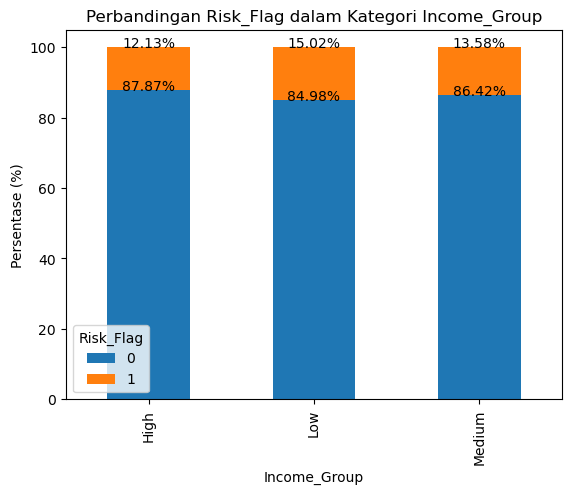

<Figure size 1000x800 with 0 Axes>

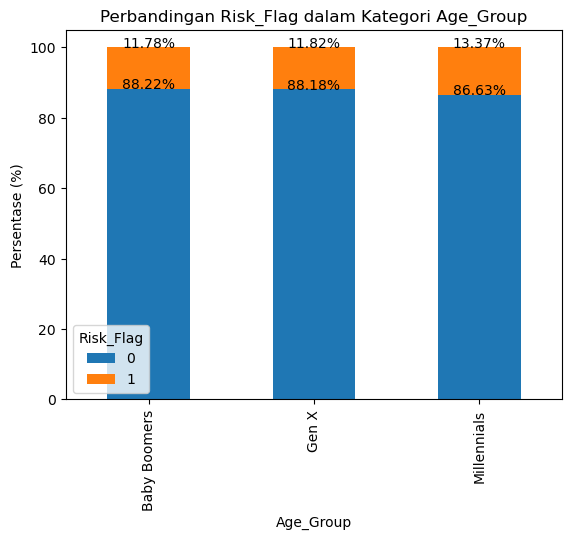

<Figure size 1000x800 with 0 Axes>

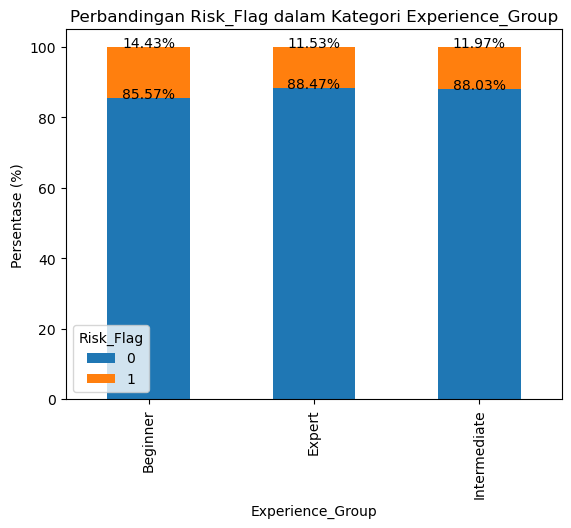

<Figure size 1000x800 with 0 Axes>

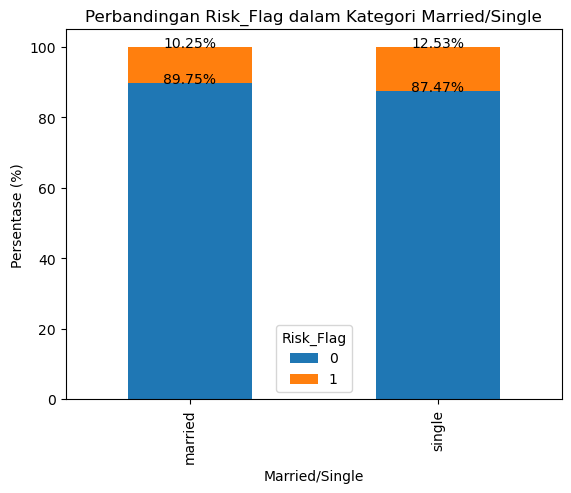

<Figure size 1000x800 with 0 Axes>

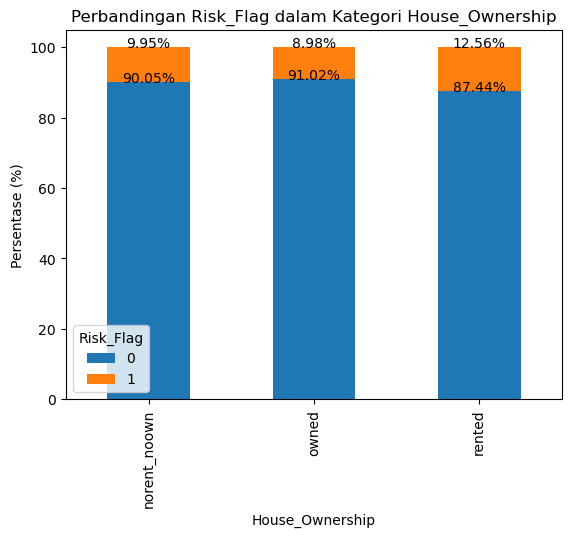

<Figure size 1000x800 with 0 Axes>

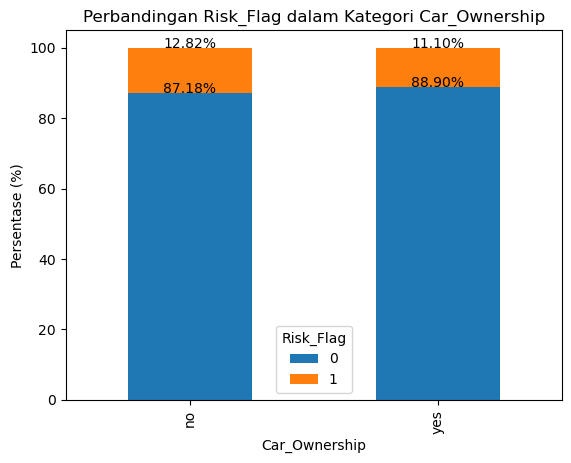

<Figure size 1000x800 with 0 Axes>

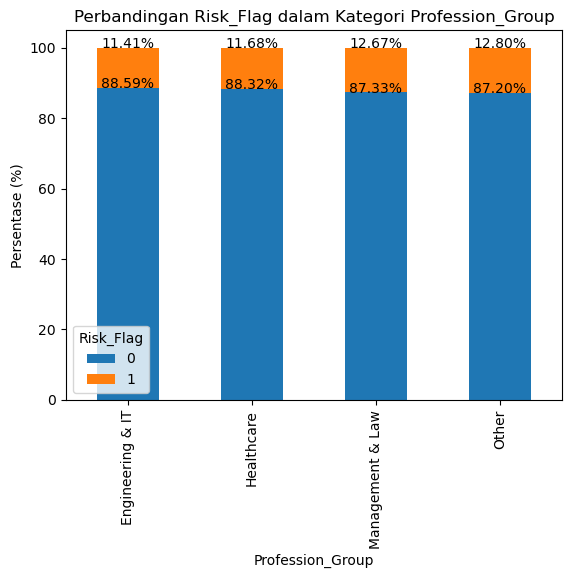

<Figure size 1000x800 with 0 Axes>

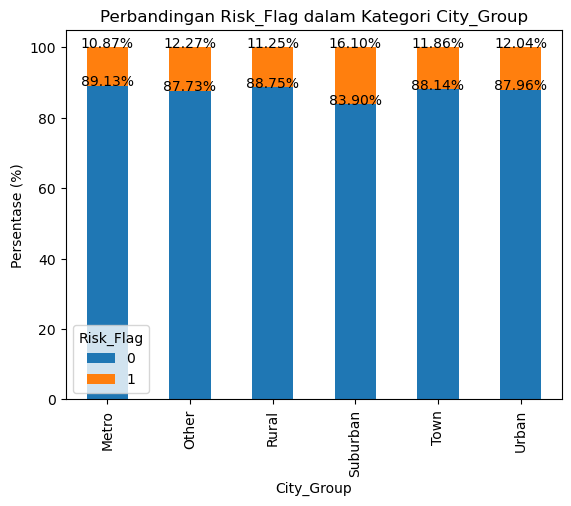

<Figure size 1000x800 with 0 Axes>

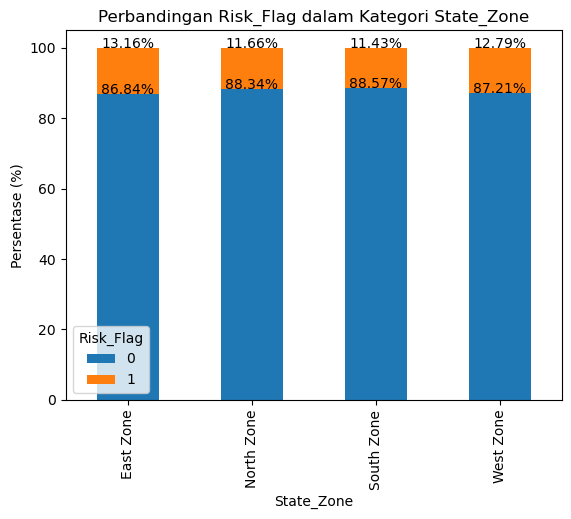

<Figure size 1000x800 with 0 Axes>

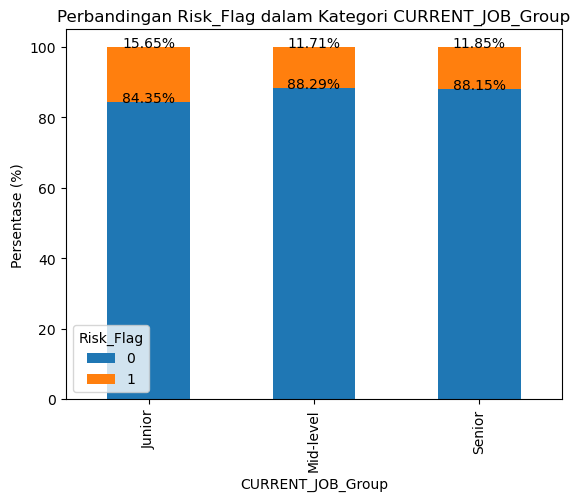

<Figure size 1000x800 with 0 Axes>

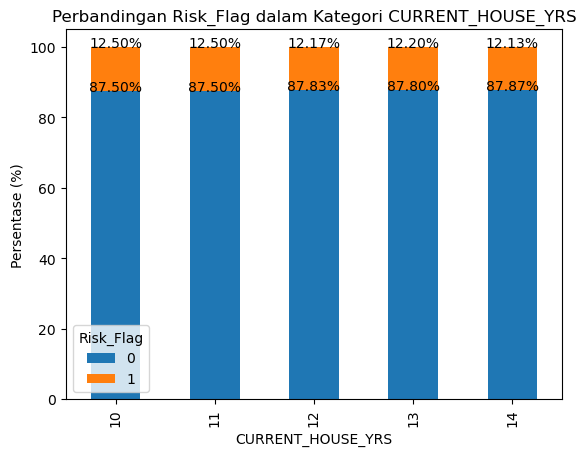

In [55]:
kolom_kategorikal = ['Income_Group', 'Age_Group', 'Experience_Group', 'Married/Single', 'House_Ownership',
                    'Car_Ownership', 'Profession_Group', 'City_Group', 'State_Zone', 'CURRENT_JOB_Group', 'CURRENT_HOUSE_YRS']

for kategori in kolom_kategorikal:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase Risk_Flag (0 dan 1) dalam setiap kategori
    grouped_data = data.groupby(kategori)['Risk_Flag'].value_counts(
        normalize=True).unstack() * 100

    ax = grouped_data.plot(kind='bar', stacked=True)
    plt.title(f'Perbandingan Risk_Flag dalam Kategori {kategori}')
    plt.ylabel('Persentase (%)')

    # Menambahkan label persentase pada plot
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

    plt.show()


## 4. Business Insight

Dalam penentuan pemberian kredit kepada nasabah, dapat menerapkan prinsip analisa 5C yang meliputi Character (Watak), Capacity (Kemampuan), Capital (Modal), Condition (Kondisi), dan Collateral (Jaminan).
Dalam kemampuan nasabah, nasabah dengan income low lebih berpotensi gagal bayar pinjaman dengan persentase 15%, dibanding dengan nasabah yang memiliki income medium 14%, dan income high 12%. Selain itu, pada feature Age tidak ada perbedaan yang signifikan antara 3 generasi yaitu Gen X, Millennials, dan Baby Boomers dengan risiko gagal bayar pinjaman. Dan untuk feature Experience juga tidak ada perbedaan yang signifikan, namun semakin lama pengalaman nasabah maka semakin kecil nasabah berpotensi gagal bayar pinjaman. Begitu juga dengan feature Current_Job_Yrs, tidak ada perbedaan yang signifikan, namun nasabah dengan current job rendah atau junior maka potensi gagal bayar pinjaman lebih tinggi daripada mid-level dan senior.